In [88]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "./city_data.csv"
ride_data_to_load = "./ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_data = pd.merge(ride_data, city_data, how="left", on=['city', 'city'])
# Display the data table for preview
pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [89]:
# Groupby dataset city
grpby = pyber_data.groupby(['city'])

# Total fare per city
fare = grpby['fare'].sum()

# Average fare per city
average_fare = grpby['fare'].mean()

# Total number of rides per city
ride = grpby['ride_id'].count()

# Calculate the driver count
driver_count = grpby['driver_count'].sum()

# Define city type
city_type = grpby['type'].first()

# Create dataframe to hold variables (to see what data looks like)
ride_summary = pd.DataFrame({ 'Average Fare': average_fare,'Total Fare': fare,'Total Rides': ride,'Driver Count': driver_count,'Type': city_type})


## Bubble Plot of Ride Sharing Data

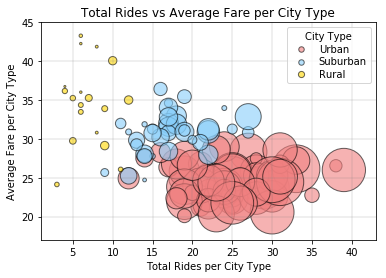

In [100]:
# OBTAIN THE X AND Y COORDINATES FOR EACH OF THE THREE CITY TYPES 
# X Coordinates : total rides per city
total_rides_u = ride_summary.loc[ride_summary["Type"]=="Urban"].groupby('city').sum()['Total Rides']
total_rides_s = ride_summary.loc[ride_summary["Type"]=="Suburban"].groupby('city').sum()['Total Rides']
total_rides_r = ride_summary.loc[ride_summary["Type"]=="Rural"].groupby('city').sum()['Total Rides']

# Y coordinates : average fare per city
average_fare_u = ride_summary.loc[ride_summary["Type"]=="Urban"].groupby('city').mean()['Average Fare']
average_fare_s = ride_summary.loc[ride_summary["Type"]=="Suburban"].groupby('city').mean()['Average Fare']
average_fare_r= ride_summary.loc[ride_summary["Type"]=="Rural"].groupby('city').mean()['Average Fare']

# Marker size : average driver count per city
dcountu = ride_summary.loc[ride_summary["Type"]=="Urban"].groupby('city').mean()['Driver Count']
dcounts = ride_summary.loc[ride_summary["Type"]=="Suburban"].groupby('city').mean()['Driver Count']
dcountr = ride_summary.loc[ride_summary["Type"]=="Rural"].groupby('city').mean()['Driver Count']

# Build the scatter plots for each city types
plt.scatter(total_rides_u, average_fare_u, marker='o', c='lightcoral',edgecolors="black", s=dcountu, alpha = 0.6)
plt.scatter(total_rides_s, average_fare_s, marker='o', c='lightskyblue',edgecolors="black", s=dcounts, alpha = 0.6)
plt.scatter(total_rides_r, average_fare_r, marker='o', c='gold',edgecolors="black", s=dcountr, alpha = 0.6)

# Incorporate the other graph properties
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=1)
plt.xlim((1, 43))
plt.ylim((17, 45))
plt.title("Total Rides vs Average Fare per City Type")
plt.xlabel("Total Rides per City Type")
plt.ylabel("Average Fare per City Type")

# Create a legend and marker size
lgnd = plt.legend(['Urban', 'Suburban', 'Rural'], labelspacing=0.25, title = 'City Type', markerscale=1);
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]

# Incorporate a text label regarding circle size
#textstr = 'Circle size correlates with driver count per city'
#plt.text(1000, 1000, textstr, fontsize=10)

# Save Figure
plt.savefig('Ride_Sharing_Data_bbplot.png')

# Show plot
plt.show()


## Total Fares by City Type

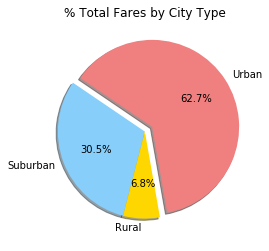

In [93]:
# Calculate Type Percents
urban = ride_summary.loc[ride_summary["Type"]=="Urban"].groupby('Type').sum()['Total Fare'] / fare.sum() *100
suburban = ride_summary.loc[ride_summary["Type"]=="Suburban"].groupby('Type').sum()['Total Fare'] / fare.sum() *100
rural = ride_summary.loc[ride_summary["Type"]=="Rural"].groupby('Type').sum()['Total Fare'] / fare.sum() *100
typePercentage = [urban, suburban, rural]
labels = ["Urban", "Suburban", "Rural"]
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0.1, 0.0, 0.0)
plt.title("% Total Fares by City Type")

# Build Pie Chart
plt.pie(typePercentage, labels=labels, explode = explode, colors = colors, autopct='%1.1f%%', shadow=True, startangle=280)

# Save Figure
plt.savefig('Total_Fares_by_City_Type.png')

# Show Figure
plt.show()

## Total Rides by City Type

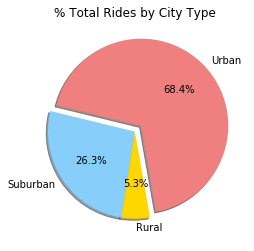

In [94]:
# Calculate Ride Percents
urban_rides = ride_summary.loc[ride_summary["Type"]=="Urban"].groupby('Type').sum()['Total Rides'] / ride.sum() *100
suburban_rides = ride_summary.loc[ride_summary["Type"]=="Suburban"].groupby('Type').sum()['Total Rides'] / ride.sum() *100
rural_rides = ride_summary.loc[ride_summary["Type"]=="Rural"].groupby('Type').sum()['Total Rides'] / ride.sum() *100
urban_rides

typePercentage1 = [urban_rides, suburban_rides, rural_rides]
labels1 = ["Urban", "Suburban", "Rural"]
colors1 = ["lightcoral", "lightskyblue", "gold"]
explode = (0.1, 0.0, 0.0)
plt.title("% Total Rides by City Type")

# Build Pie Chart
plt.pie(typePercentage1, labels=labels1, explode = explode, colors = colors1, autopct='%1.1f%%', shadow=True, startangle=280)
# Save Figure
plt.savefig('Total_Rides_by_City_Type.png')
# Show Figure
plt.show()

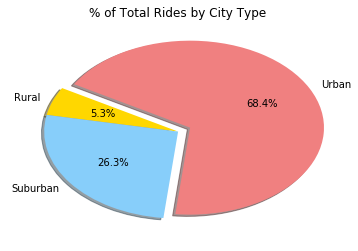

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

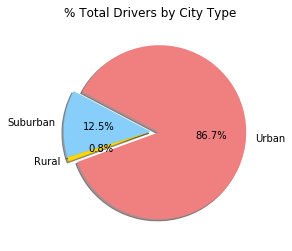

In [99]:
# Calculate Driver Percents
urban_driver = ride_summary.loc[ride_summary["Type"]=="Urban"].groupby('Type').sum()['Driver Count'] / driver_count.sum() *100
suburban_driver = ride_summary.loc[ride_summary["Type"]=="Suburban"].groupby('Type').sum()['Driver Count'] / driver_count.sum() *100
rural_driver = ride_summary.loc[ride_summary["Type"]=="Rural"].groupby('Type').sum()['Driver Count'] / driver_count.sum() *100
urban_driver

typePercentage2 = [urban_driver, suburban_driver, rural_driver]
labels2 = ["Urban", "Suburban", "Rural"]
colors2 = ["lightcoral", "lightskyblue", "gold"]
explode = (0.1, 0.0, 0.0)
plt.title("% Total Drivers by City Type")

# Build Pie Chart
plt.pie(typePercentage2, labels=labels2, explode = explode, colors = colors2, autopct='%1.1f%%', shadow=True, startangle=200)
# Save Figure
plt.savefig('Total_Drivers_by_City_Type.png')
# Show Figure
plt.show()